In [1]:
import json
import psycopg2
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
# plt.style.use("clint.mpl")
import matplotlib.dates as md

# silence annoying warning about plotting pd.datetime objects with mpl
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [2]:
with open("config.json") as f:
    config = json.load(f)

db_conn = psycopg2.connect(dbname=config["db_name"], 
                           user=config["db_user"], 
                           password=config["password"], 
                           host=config["cage_daq"])
db_cursor = db_conn.cursor()

OperationalError: could not connect to server: Connection timed out
	Is the server running on host "10.66.193.71" and accepting
	TCP/IP connections on port 5432?


In [4]:
cmd = "SELECT * FROM endpoint_id_map;"
db_cursor.execute(cmd)
record = db_cursor.fetchall()
df_end = pd.DataFrame(record, columns=["row", "endpoint_name", "data_type"])
# df_end

NameError: name 'db_cursor' is not defined

In [8]:
# endpoints = ['krstc_pressure', 'krstc_temp', 'krstc_ln_level', 'krstc_baseline', 'krstc_hv_vset']
endpoints = ['krstc_pressure', 'krstc_temp'] #, 'krstc_baseline']

# t = t_pacific + 8

t_earlier = '2023-02-01T00:00'
t_later = '2023-02-15T23:00'

dfs = {}

for pt in endpoints:
    query = f"SELECT value_cal, timestamp FROM numeric_data "
    query += f"WHERE endpoint_name='{pt}'"
    query += f"AND timestamp>='{t_earlier}' and timestamp<='{t_later}';"

    db_cursor.execute(query)
    record = db_cursor.fetchall()
    df = pd.DataFrame(record, columns=[pt, 'timestamp']) 
    dfs[pt] = df
    
print(f'Found {len(dfs[endpoints[0]])} entries.')

Found 39740 entries.


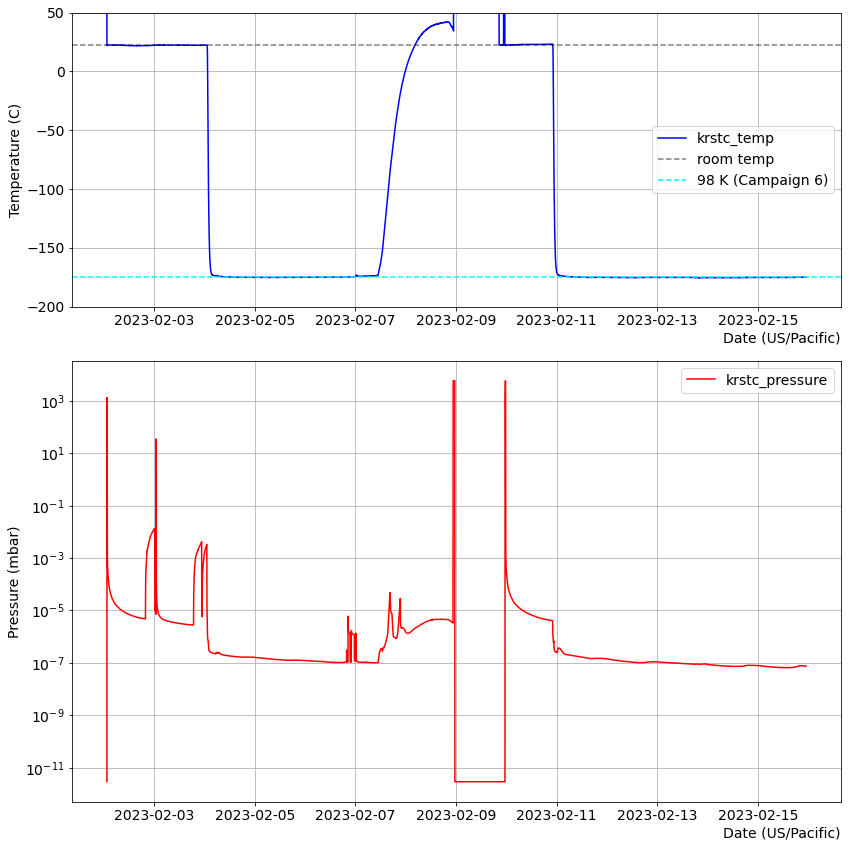

In [20]:
# %matplotlib widget
from matplotlib.dates import DateFormatter

# ts = dfs['cage_pressure']['timestamp'].dt.tz_localize('US/Pacific')

f, p = plt.subplots(2, 1, figsize=(12,12), gridspec_kw={'height_ratios': [1, 1.5]}, tight_layout=True)
# f.suptitle('KrSTC Gauge Test, December 13, 2021')

df = dfs['krstc_temp']
p[0].plot(df.timestamp.dt.tz_localize('US/Pacific'), df.krstc_temp, color='b', label='krstc_temp')
p[0].axhline(y=22, color='black', linestyle='--', alpha=0.5, label='room temp')
p[0].axhline(y=-175, color='cyan', linestyle='--', alpha=1, label='98 K (Campaign 6)')
p[0].legend()
p[0].grid()
p[0].set_xlabel('Date (US/Pacific)', ha='right', x=1)
p[0].set_ylabel('Temperature (C)')
# p[0].set_yscale('log')
p[0].set_ylim([-200, 50])

df = dfs['krstc_pressure']
p[1].plot(df.timestamp.dt.tz_localize('US/Pacific'), df.krstc_pressure, color='r')
p[1].legend(['krstc_pressure'])
p[1].grid()
p[1].set_xlabel('Date (US/Pacific)', ha='right', x=1)
p[1].set_ylabel('Pressure (mbar)')
p[1].set_yscale('log')

# print(df.krstc_pressure)

# date_form = DateFormatter("%m-%d %H:%m")
# p[0].xaxis.set_major_formatter(date_form)

# for ept in endpoints[1:]:
#     df = dfs[ept]
#     p[1].plot(df.timestamp.dt.tz_localize('US/Pacific'), df[ept], color='r', label=ept)
    
# p[1].legend()
# p[1].grid()
# p[1].set_ylabel('Temp (C)')
# p[1].set_xlabel('Date (US/Pacific)', ha='right', x=1)
# p[1].set_yscale('log')

0        2.930987e-12
1        2.930987e-12
2        2.926494e-12
3        2.926494e-12
4        2.926494e-12
             ...     
11153    1.232013e-07
11154    1.232013e-07
11155    1.232013e-07
11156    1.230125e-07
11157    1.232013e-07
Name: krstc_pressure, Length: 11158, dtype: float64


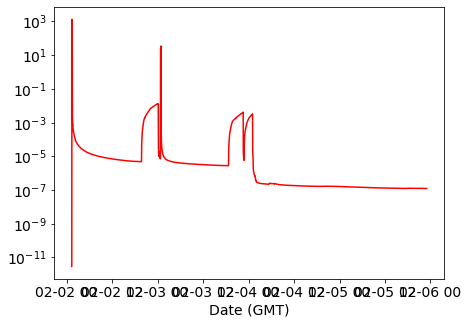

In [6]:
from matplotlib.dates import DateFormatter

font = {'size'   : 14}

plt.rc('font', **font)

fig = plt.figure(figsize = (7, 5))
# plt.ylabel('Pressure (mbar)')
plt.xlabel('Date (GMT)')
# plt.title('Pressure over Time, KrSTC')
# plt.xscale('log')
# plt.yscale('log')


df = dfs['krstc_pressure']
print(df.krstc_pressure)
plt.plot(df.timestamp.dt.tz_localize('US/Pacific'), df.krstc_pressure, 'r')
plt.yscale('log')

# df = dfs['krstc_temp']
# print(df.krstc_temp)
# plt.plot(df.timestamp.dt.tz_localize('US/Pacific'), df.krstc_temp, 'r')

# df = dfs['krstc_ln_level']
# print(df.krstc_ln_level)
# plt.plot(df.timestamp.dt.tz_localize('US/Pacific'), df.krstc_ln_level, 'r')

# df = dfs['krstc_baseline']
# print(df.krstc_baseline)
# plt.plot(df.timestamp.dt.tz_localize('US/Pacific'), df.krstc_baseline, 'r')

plt.show()